<a href="https://colab.research.google.com/github/calamistratus/Houses_project/blob/main/Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import clear_output
from matplotlib import colormaps

In [ ]:
path = ''

df = pd.read_csv(path + 'fixed_df.csv').set_index('Id')
unfixed_df = pd.read_csv(path + 'df.csv').drop('Unnamed: 0', axis=1).set_index('Id')

In [ ]:
value_names = {
    '1.5Fin': 'finished 1.5story',
    '1.5Unf': 'unfinished 1.5story',
    '120': 'pud 1story',
    '150': 'pud 1.5story',
    '160': 'pud 2story',
    '180': 'multilevel pud',
    '190': 'family conversion',
    '1Fam': 'single family',
    '1Story': 'one story',
    '2.5Fin': 'finished 2.5story',
    '2.5Unf': 'unfinished 2.5story',
    '20': '1story newer',
    '2Story': 'two story',
    '2Types': 'multiple garages',
    '2fmCon': 'two-family',
    '30': '1story older',
    '40': '1story attic',
    '45': 'unfinished 1.5story',
    '50': 'finished 1.5story',
    '60': '2story newer',
    '70': '2story older',
    '75': '2.5story all',
    '80': 'split level',
    '85': 'split foyer',
    '90': 'duplex',
    'ALQ': 'avg living quarters',
    'Abnorml': 'abnormal sale',
    'AdjLand': 'adjoining land',
    'Alloca': 'allocated sale',
    'Artery': 'arterial street',
    'AsbShng': 'asbestos shingles',
    'AsphShn': 'asphalt shingles',
    'Attchd': 'attached garage',
    'Av': 'avg exposure',
    'BLQ': 'low living quarters',
    'Basment': 'basement garage',
    'Blmngtn': 'bloomington heights',
    'Blueste': 'bluestem',
    'Bnk': 'banked',
    'BrDale': 'briardale',
    'BrkCmn': 'brick common',
    'BrkComm': 'brick common',
    'BrkFace': 'brick face',
    'BrkSide': 'brookside',
    'BrkTil': 'brick tile',
    'BuiltIn': 'built-in garage',
    'CBlock': 'cinder block',
    'COD': 'court deed',
    'CWD': 'cash warranty',
    'CarPort': 'car port',
    'CemntBd': 'cement board',
    'ClearCr': 'clear creek',
    'CollgCr': 'college creek',
    'CompShg': 'composite shingle',
    'Con': 'contract sale',
    'ConLD': 'low down',
    'ConLI': 'low interest',
    'ConLw': 'low terms',
    'Corner': 'corner lot',
    'Crawfor': 'crawford',
    'CulDSac': 'cul-de-sac',
    'Detchd': 'detached garage',
    'Duplex': 'duplex',
    'Edwards': 'edwards',
    'Ex': 'excellent',
    'FR2': 'frontage 2sides',
    'FR3': 'frontage 3sides',
    'FV': 'village residential',
    'Fa': 'fair',
    'Family': 'family sale',
    'Feedr': 'feeder street',
    'Fin': 'finished',
    'Flat': 'flat roof',
    'FuseA': 'fuse average',
    'FuseF': 'fuse fair',
    'GLQ': 'good quarters',
    'Gable': 'gable roof',
    'Gambrel': 'gambrel roof',
    'Gar2': 'second garage',
    'Gd': 'good',
    'GdPrv': 'good privacy',
    'GdWo': 'good wood',
    'Gilbert': 'gilbert',
    'Grvl': 'gravel',
    'Gtl': 'gentle slope',
    'HLS': 'hillside',
    'HdBoard': 'hardboard',
    'Hip': 'hip roof',
    'IDOTRR': 'dot railroad',
    'IR1': 'slight irregular',
    'IR2': 'moderate irregular',
    'IR3': 'irregular',
    'ImStucc': 'imitation stucco',
    'Inside': 'inside lot',
    'Low': 'depression',
    'Lvl': 'level',
    'LwQ': 'low quality',
    'Mansard': 'mansard roof',
    'MeadowV': 'meadow village',
    'MetalSd': 'metal siding',
    'Mitchel': 'mitchell',
    'Mn': 'min exposure',
    'MnPrv': 'min privacy',
    'MnWw': 'min wood',
    'Mod': 'moderate slope',
    'N': 'none',
    'NAmes': 'north ames',
    'NPkVill': 'northpark villa',
    'NWAmes': 'nw ames',
    'New': 'new home',
    'No': 'none',
    'NoRidge': 'northridge',
    'Norm': 'normal',
    'Normal': 'normal sale',
    'NridgHt': 'northridge heights',
    'OldTown': 'old town',
    'Oth': 'other sale',
    'Other': 'other material',
    'Othr': 'other feature',
    'P': 'partial pavement',
    'PConc': 'poured concrete',
    'Partial': 'partial sale',
    'Pave': 'paved',
    'Plywood': 'plywood',
    'Po': 'poor',
    'PosA': 'adjacent positive',
    'PosN': 'near positive',
    'RFn': 'rough finish',
    'RH': 'high density',
    'RL': 'low density',
    'RM': 'medium density',
    'RRAe': 'adjacent railroad',
    'RRAn': 'adjacent railroad',
    'RRNe': 'near railroad',
    'RRNn': 'near railroad',
    'Rec': 'rec room',
    'Reg': 'regular',
    'SBrkr': 'circuit breakers',
    'SFoyer': 'split foyer',
    'SLvl': 'split level',
    'SWISU': 'swISU',
    'Sawyer': 'sawyer',
    'SawyerW': 'sawyer west',
    'Sev': 'severe slope',
    'Shed': 'shed',
    'Slab': 'slab foundation',
    'Somerst': 'somerset',
    'Stone': 'stone',
    'StoneBr': 'stone brook',
    'Stucco': 'stucco',
    'TA': 'average',
    'Tar&Grv': 'tar gravel',
    'TenC': 'tennis court',
    'Timber': 'timberland',
    'Twnhs': 'townhouse',
    'TwnhsE': 'townhouse end',
    'Unf': 'unfinished',
    'Veenker': 'veenker',
    'VinylSd': 'vinyl siding',
    'WD': 'warranty deed',
    'Wd Sdng': 'wood siding',
    'WdShing': 'wood shingles',
    'Wood': 'wood foundation',
    'Y': 'yes',
    'nan': 'missing',
    'no': 'none',
    'C (all)': 'commercial zone',
    'Brk Cmn': 'brick common',
    'Wd Shng': 'wood shingles',
    'CmentBd': 'cement board'

}
column_names = {
    'MSSubClass': 'Building class',
    'MSZoning': 'Zoning type',
    'LotFrontage': 'Street frontage',
    'LotArea': 'Lot size',
    'Alley': 'Alley type',
    'LotShape': 'Lot shape',
    'LandContour': 'Land flatness',
    'LotConfig': 'Lot layout',
    'LandSlope': 'Slope',
    'Neighborhood': 'Neighborhood',
    'Condition1': 'Road proximity',
    'Condition2': 'Secondary road proximity',
    'BldgType': 'Dwelling type',
    'HouseStyle': 'House style',
    'OverallQual': 'Overall quality',
    'OverallCond': 'Overall condition',
    'YearBuilt': 'Year built',
    'YearRemodAdd': 'Remodel year',
    'RoofStyle': 'Roof style',
    'RoofMatl': 'Roof material',
    'Exterior1st': 'Exterior 1',
    'Exterior2nd': 'Exterior 2',
    'MasVnrType': 'Masonry type',
    'MasVnrArea': 'Masonry area',
    'ExterQual': 'Exterior quality',
    'ExterCond': 'Exterior condition',
    'Foundation': 'Foundation',
    'BsmtQual': 'Basement height',
    'BsmtCond': 'Basement condition',
    'BsmtExposure': 'Basement exposure',
    'BsmtFinType1': 'Finished area 1',
    'BsmtFinSF1': 'Finished sqft 1',
    'BsmtFinType2': 'Finished area 2',
    'BsmtFinSF2': 'Finished sqft 2',
    'BsmtUnfSF': 'Unfinished sqft',
    'TotalBsmtSF': 'Total basement sqft',
    'Heating': 'Heating',
    'HeatingQC': 'Heating quality',
    'CentralAir': 'Central AC',
    'Electrical': 'Electrical',
    '1stFlrSF': '1st floor sqft',
    '2ndFlrSF': '2nd floor sqft',
    'LowQualFinSF': 'Low quality sqft',
    'GrLivArea': 'Living area sqft',
    'BsmtFullBath': 'Basement full bath',
    'BsmtHalfBath': 'Basement half bath',
    'FullBath': 'Full baths',
    'HalfBath': 'Half baths',
    'BedroomAbvGr': 'Bedrooms',
    'KitchenAbvGr': 'Kitchens',
    'KitchenQual': 'Kitchen quality',
    'TotRmsAbvGrd': 'Total rooms',
    'Functional': 'Home functionality',
    'Fireplaces': 'Fireplaces',
    'FireplaceQu': 'Fireplace quality',
    'GarageType': 'Garage type',
    'GarageYrBlt': 'Garage year',
    'GarageFinish': 'Garage finish',
    'GarageCars': 'Garage size (cars)',
    'GarageArea': 'Garage sqft',
    'GarageQual': 'Garage quality',
    'GarageCond': 'Garage condition',
    'PavedDrive': 'Paved driveway',
    'WoodDeckSF': 'Deck sqft',
    'OpenPorchSF': 'Porch sqft',
    'EnclosedPorch': 'Enclosed porch',
    '3SsnPorch': '3-season porch',
    'ScreenPorch': 'Screen porch',
    'PoolArea': 'Pool sqft',
    'PoolQC': 'Pool quality',
    'Fence': 'Fence',
    'MiscFeature': 'Misc feature',
    'MiscVal': 'Misc value',
    'MoSold': 'Month sold',
    'YrSold': 'Year sold',
    'SaleType': 'Sale type',
    'SaleCondition': 'Sale condition',
    'SalePrice': 'Sale price',
}   # Was made using DeepSeek for the sake of time saving

In [ ]:
df_dum_stat = pd.get_dummies(df)

coolwarm = colormaps.get_cmap('coolwarm')
coolwarm_r = colormaps.get_cmap('coolwarm_r')
viridis_r = colormaps.get_cmap('viridis_r')
berlin = colormaps.get_cmap('berlin')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Alley          2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   LotConfig      2919 non-null   object 
 8   LandSlope      2919 non-null   object 
 9   Neighborhood   2919 non-null   object 
 10  Condition1     2919 non-null   object 
 11  Condition2     2919 non-null   object 
 12  BldgType       2919 non-null   object 
 13  HouseStyle     2919 non-null   object 
 14  OverallQual    2919 non-null   int64  
 15  OverallCond    2919 non-null   int64  
 16  YearBuilt      2919 non-null   int64  
 17  YearRemodAdd   2919 non-null   int64  
 18  RoofStyle    

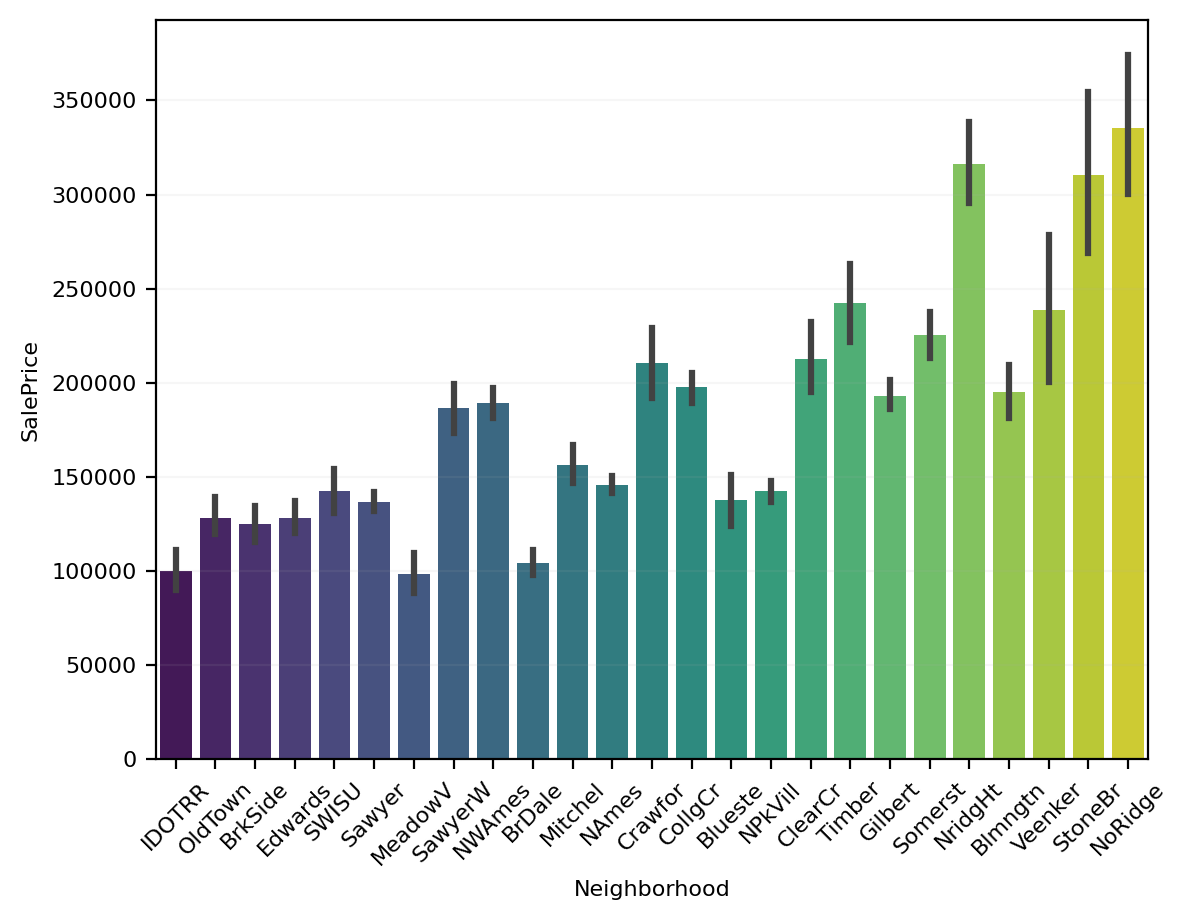

In [ ]:
plt.figure(dpi = 200)

sns.barplot(data=df.sort_values('SalePrice'), x='Neighborhood', y='SalePrice', hue='Neighborhood', palette='viridis')

plt.grid(True, alpha=.1, axis='y')
plt.xticks(rotation=45)

plt.show()

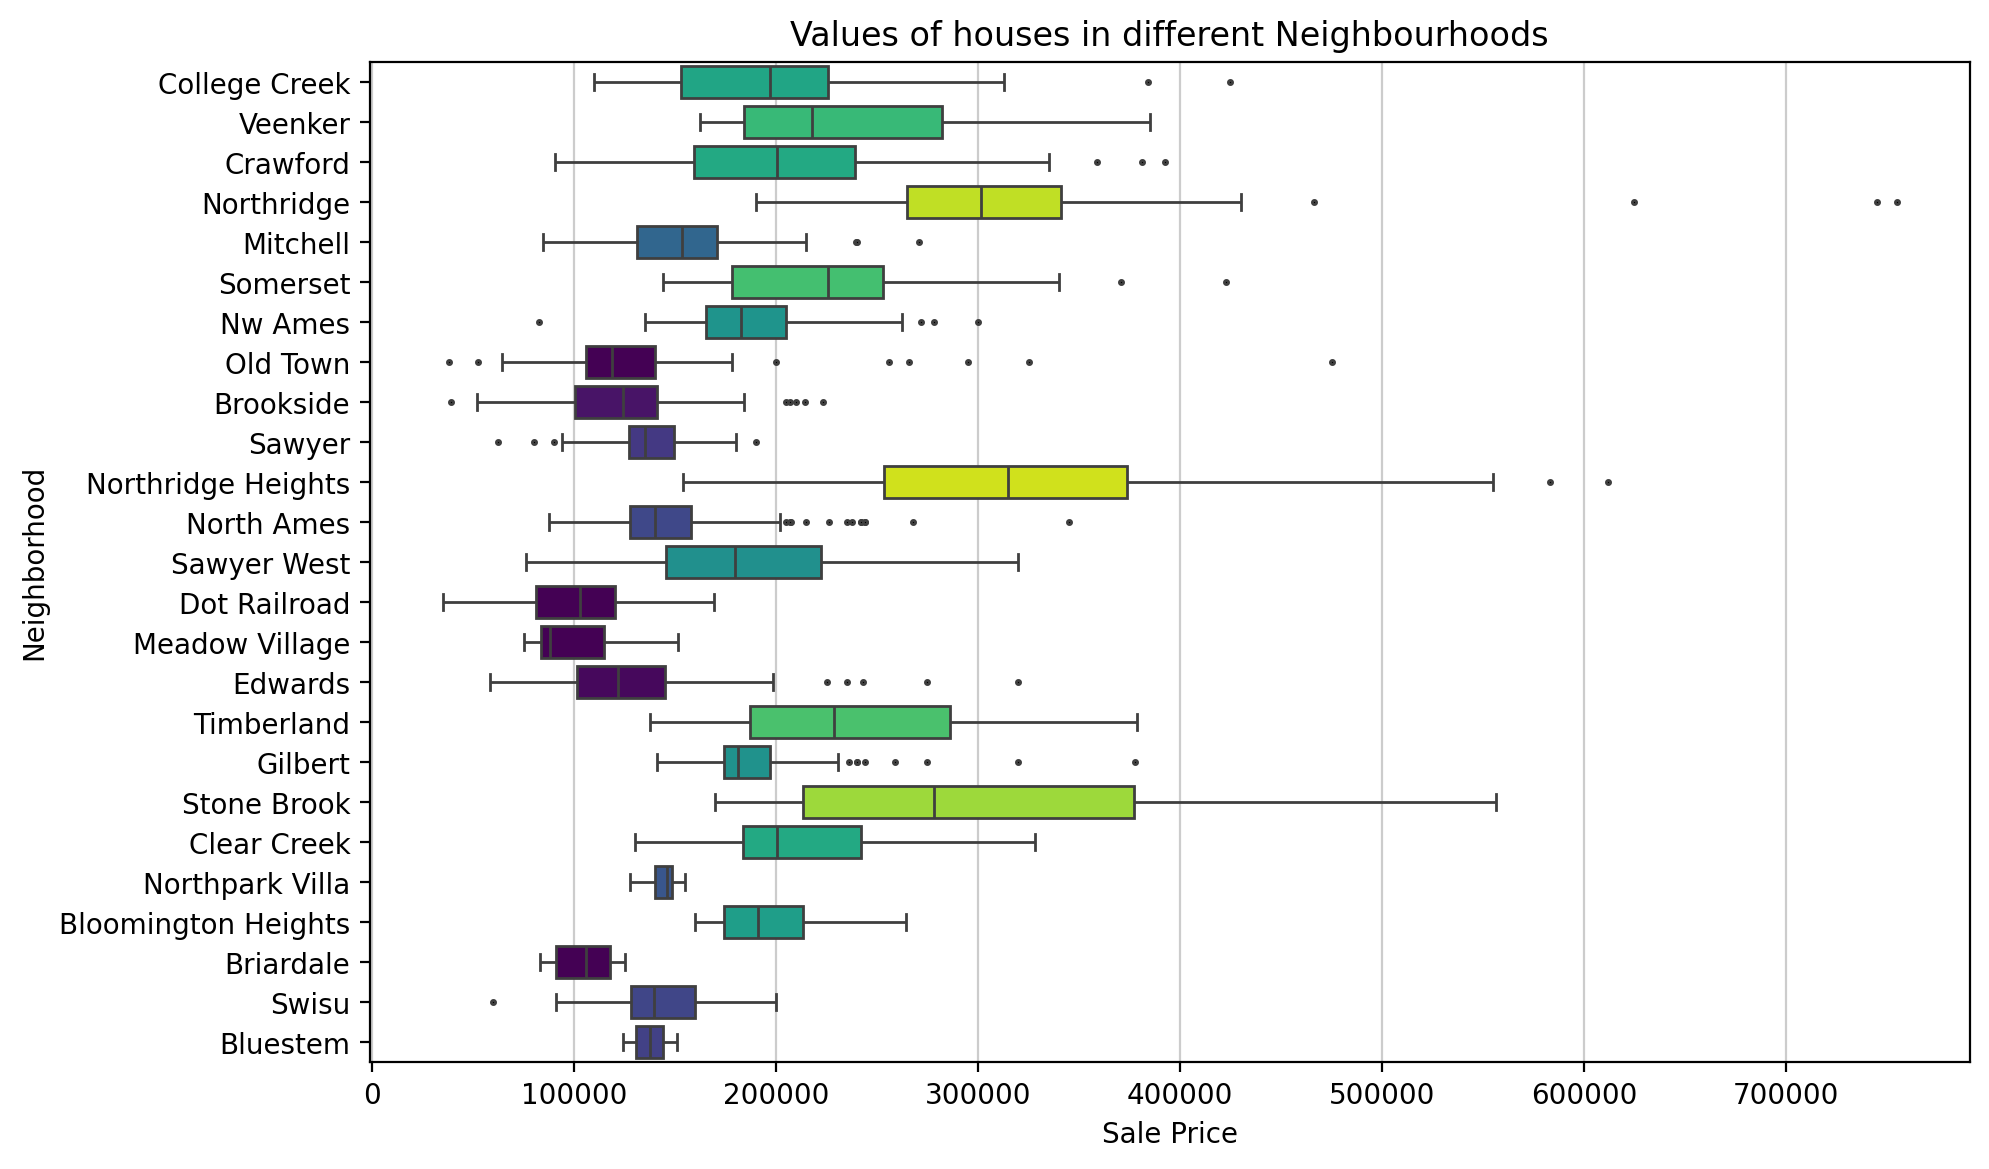

In [430]:
fig = plt.figure(dpi=200, figsize=(8, 5))

ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(data=df, orient='h', x='SalePrice', y='Neighborhood', ax=ax, flierprops={'marker' : '.', 'markerfacecolor' : 'black', 'markersize' : 3})

groupby = df.groupby('Neighborhood')['SalePrice'].median()
medians = [groupby[i.get_text()] for i in ax.get_yticklabels()]
colors = [viridis_r(i) for i in np.median(medians) / medians - .5]

for bar, color in zip(ax.patches, colors):
  bar.set_facecolor(color)

labels = []
for i in ax.get_yticklabels():
  label = i.get_text()
  label = value_names[label].title()
  labels.append(label)
ax.set_yticklabels(labels)

ax.grid(True, axis='x', color='black', alpha=.2)

ax.set_xlabel('Sale Price')
ax.set_title('Values of houses in different Neighbourhoods')

clear_output()
plt.show()

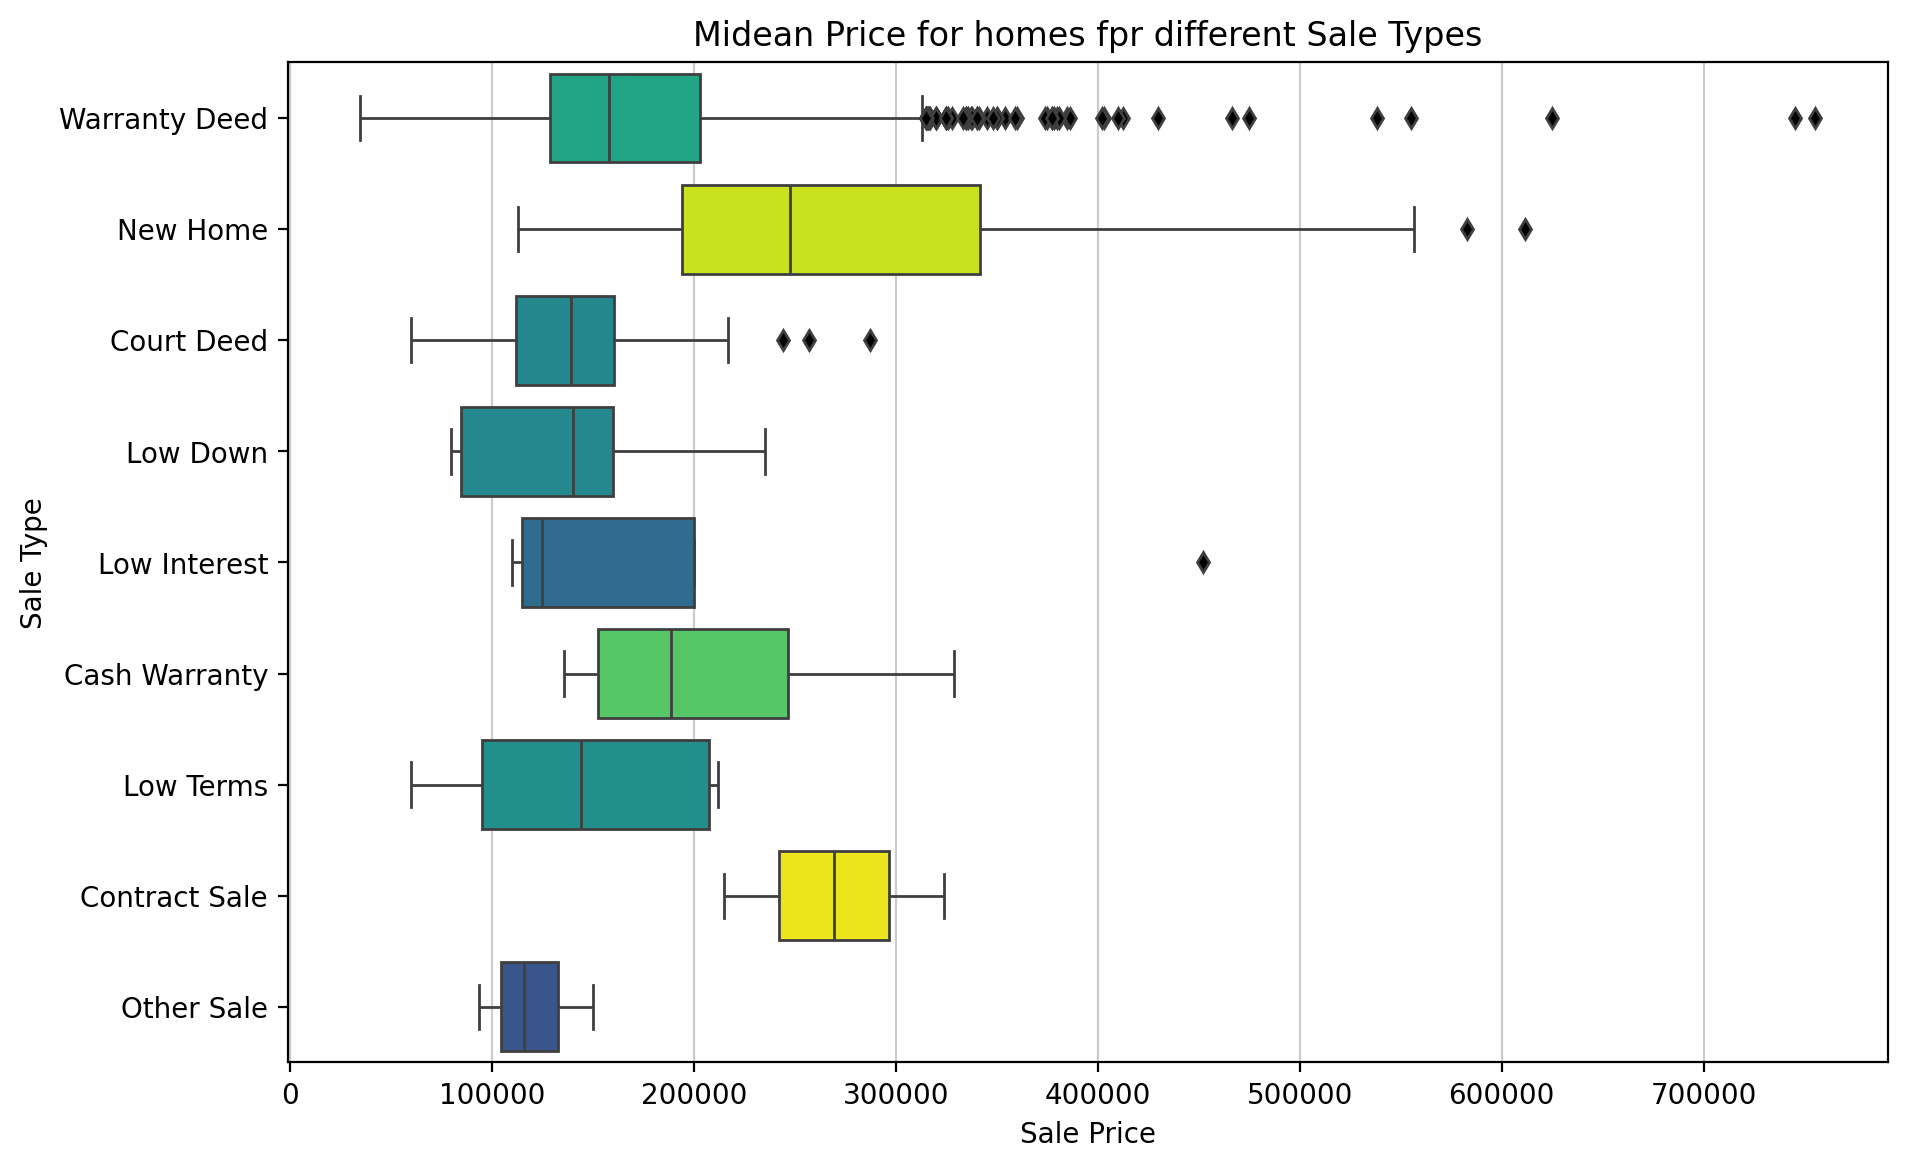

In [429]:
fig = plt.figure(dpi=200, figsize=(8, 5))

ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(data=df, orient='h', x='SalePrice', y='SaleType', ax=ax, flierprops={'marker' : 'd', 'markerfacecolor' : 'black', 'markersize' : 5})

groupby = df.groupby('SaleType')['SalePrice'].median()
medians = [groupby[i.get_text()] for i in ax.get_yticklabels()]
colors = [viridis_r(i) for i in np.median(medians) / medians - .5]

for bar, color in zip(ax.patches, colors):
  bar.set_facecolor(color)

labels = []
for i in ax.get_yticklabels():
  label = i.get_text()
  label = value_names[label].title()
  labels.append(label)
ax.set_yticklabels(labels)

ax.grid(True, axis='x', color='black', alpha=.2)

ax.set_xlabel('Sale Price')
ax.set_ylabel('Sale Type')
ax.set_title('Midean Price for homes fpr different Sale Types')

clear_output()
plt.show()

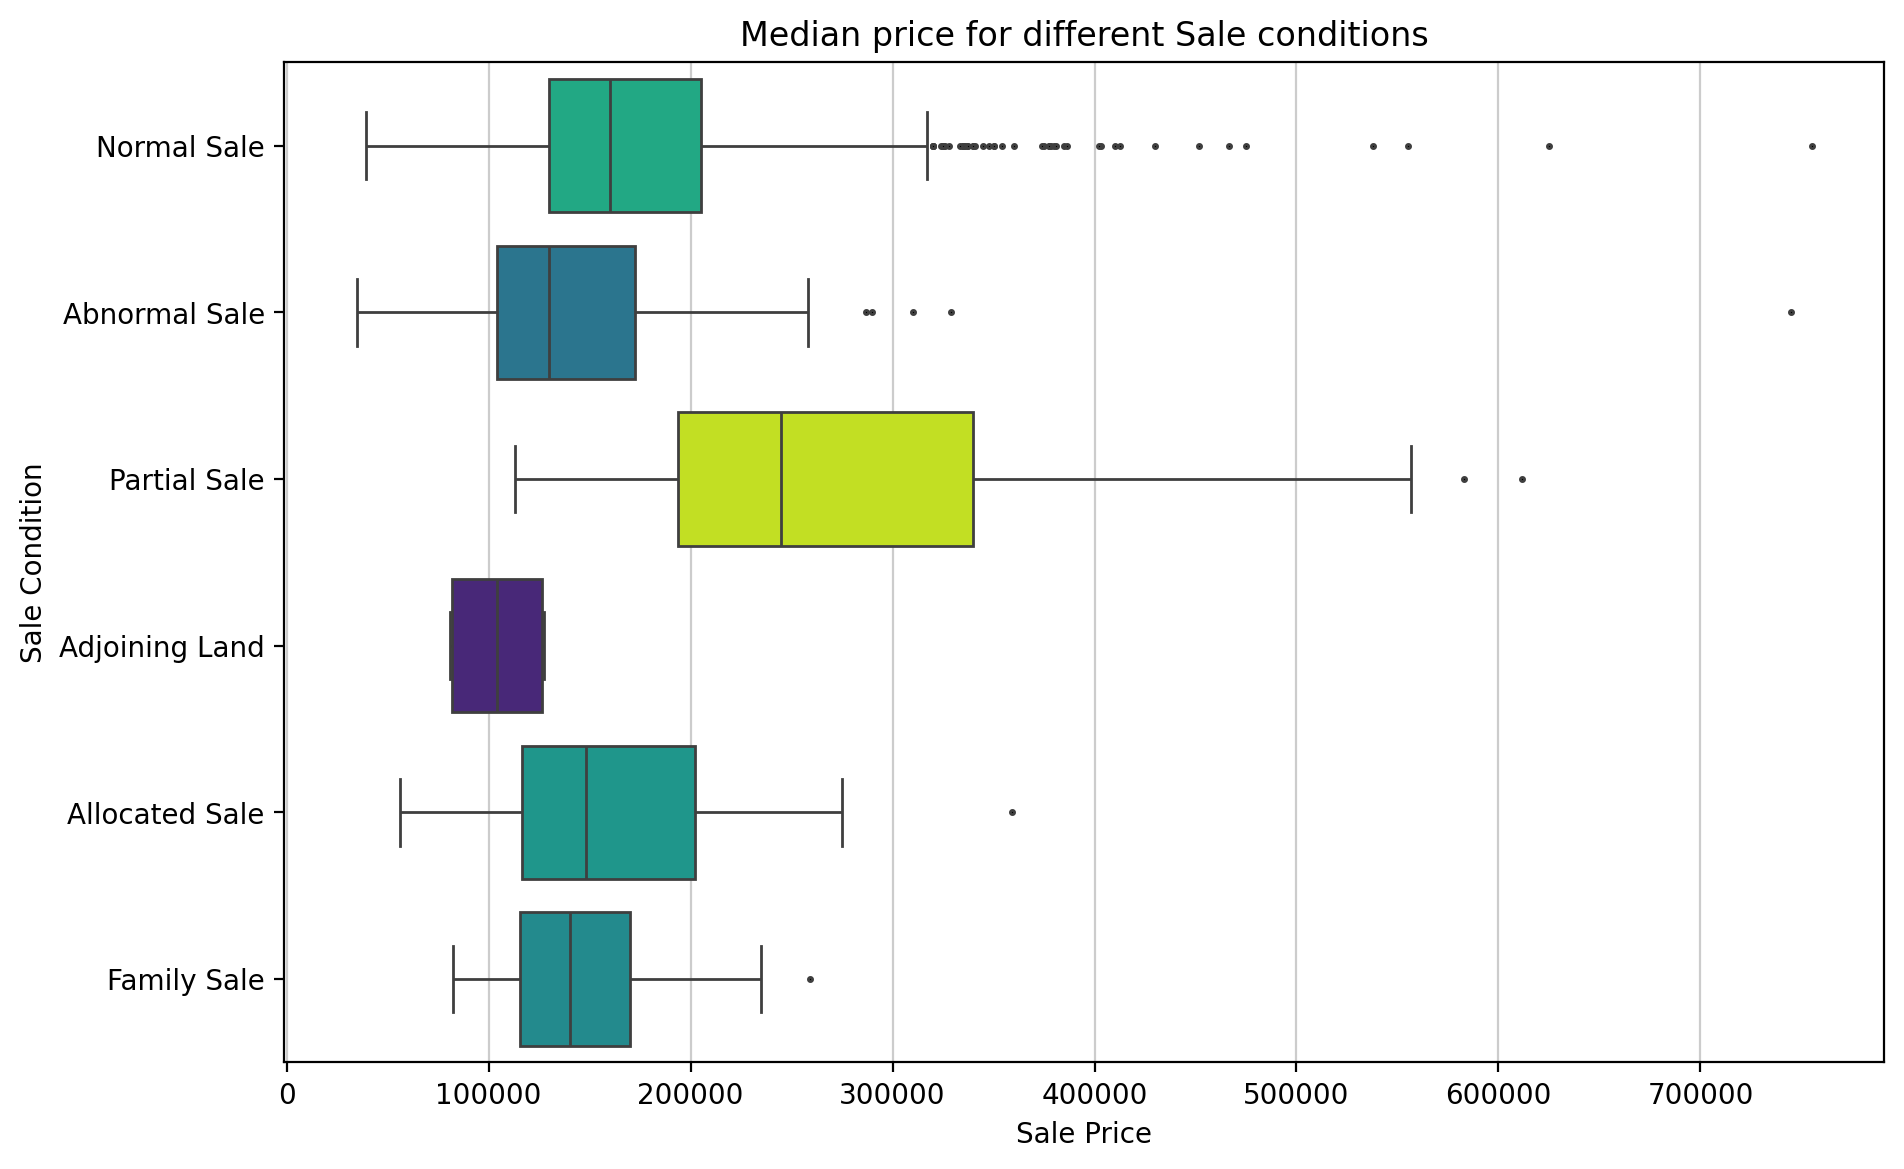

In [428]:
fig = plt.figure(dpi=200, figsize=(8, 5))

ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(data=df, orient='h', x='SalePrice', y='SaleCondition', ax=ax, flierprops={'marker' : '.', 'markerfacecolor' : 'black', 'markersize' : 3})

groupby = df.groupby('SaleCondition')['SalePrice'].median()
medians = [groupby[i.get_text()] for i in ax.get_yticklabels()]
colors = [viridis_r(i) for i in np.median(medians) / medians - .5]

for bar, color in zip(ax.patches, colors):
  bar.set_facecolor(color)

labels = []
for i in ax.get_yticklabels():
  label = i.get_text()
  label = value_names[label].title()
  labels.append(label)
ax.set_yticklabels(labels)

ax.grid(True, axis='x', color='black', alpha=.2)

ax.set_xlabel('Sale Price')
ax.set_ylabel('Sale Condition')
ax.set_title('Median price for different Sale conditions')

clear_output()
plt.show()

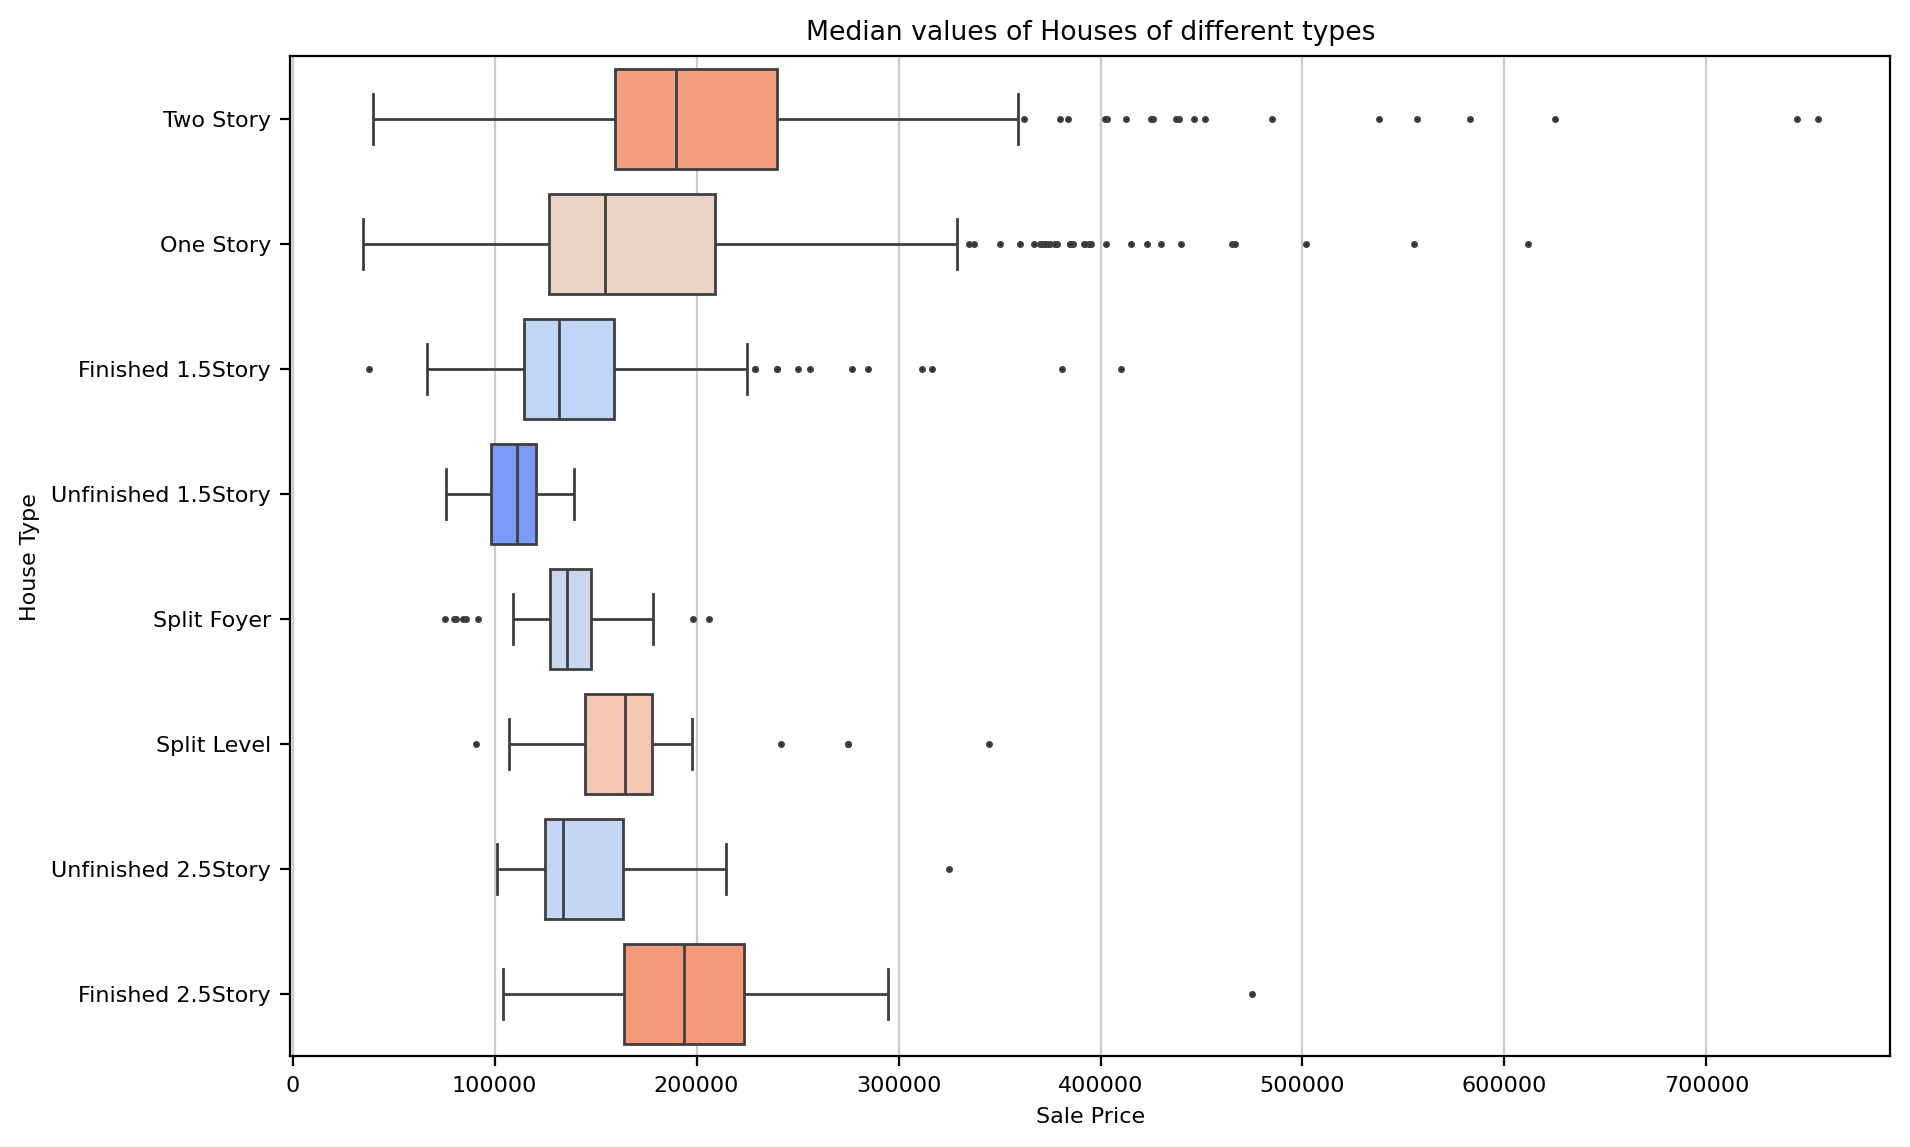

In [425]:
fig = plt.figure(dpi=200, figsize=(8, 5))

ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(data=df, orient='h', x='SalePrice', y='HouseStyle', ax=ax, flierprops={'marker' : '.', 'markerfacecolor' : 'black', 'markersize' : 3})

groupby = df.groupby('HouseStyle')['SalePrice'].median()
medians = [groupby[i.get_text()] for i in ax.get_yticklabels()]
colors = [coolwarm_r(i) for i in np.median(medians) / medians - .5]

for bar, color in zip(ax.patches, colors):
  bar.set_facecolor(color)

labels = []
for i in ax.get_yticklabels():
  label = i.get_text()
  label = value_names[label].title()
  labels.append(label)
ax.set_yticklabels(labels)

ax.grid(True, axis='x', color='black', alpha=.2)

ax.set_xlabel('Sale Price')
ax.set_ylabel('House Type')
ax.set_title('Median values of Houses of different types')

clear_output()
plt.show()

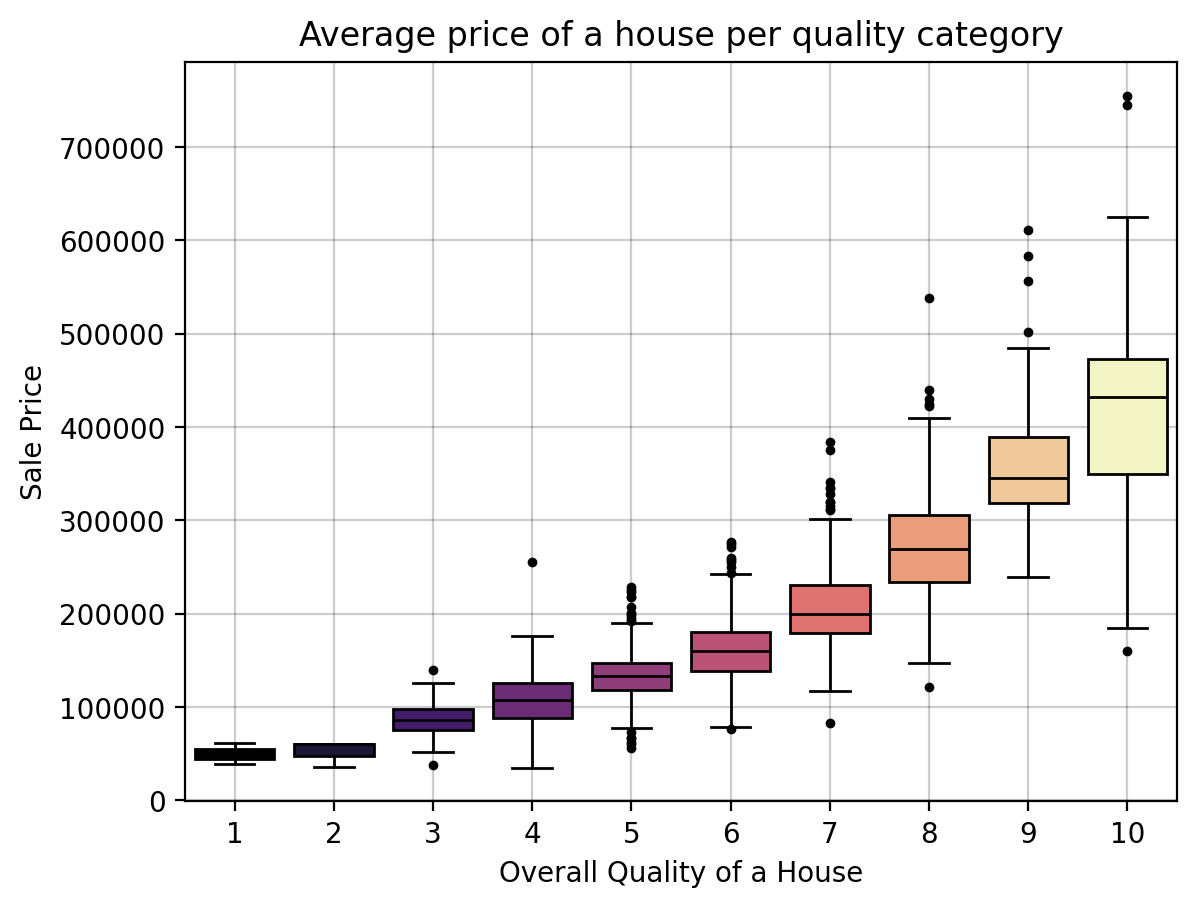

In [ ]:
plt.rcParams['font.size'] = 10

plt.figure(dpi=200)

sns.boxplot(data=df, x='OverallQual', y='SalePrice', hue='OverallQual', palette='magma', legend=False, flierprops={'marker' : '.', 'markerfacecolor' : 'black', 'markersize' : 5})

plt.grid(True, alpha=.2, color='black')

plt.title('Average price of a house per quality category')
plt.ylabel('Sale Price')
plt.xlabel('Overall Quality of a House')

plt.show()

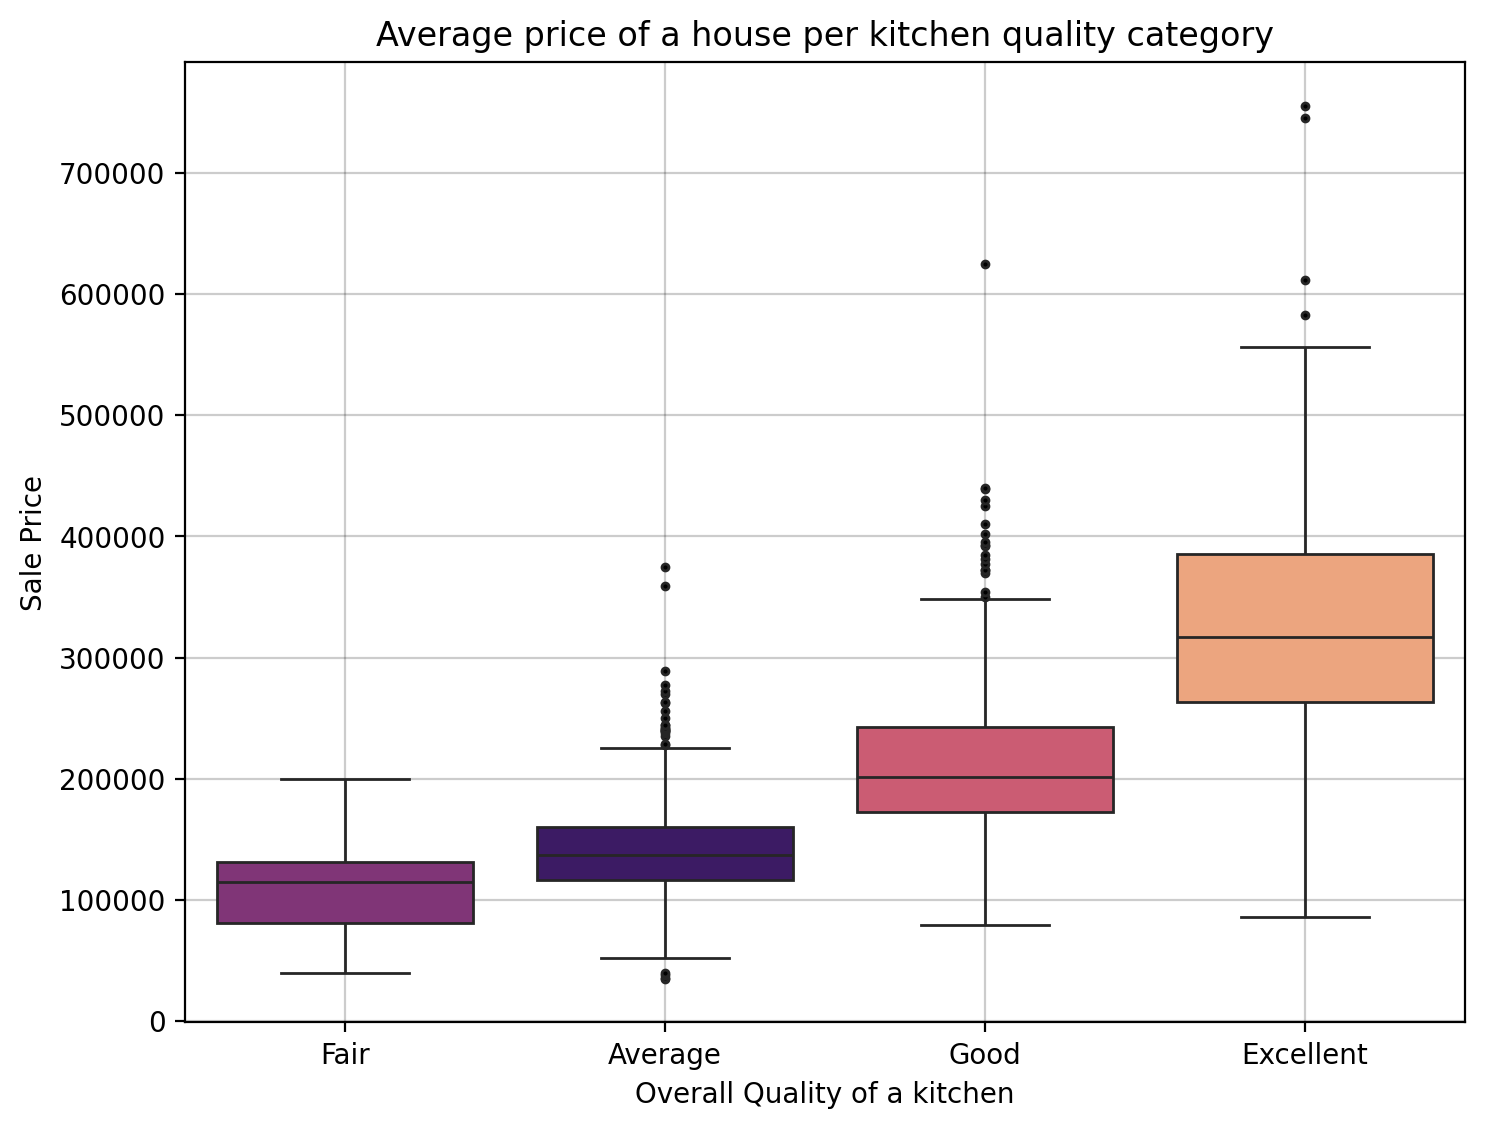

In [426]:
plt.rcParams['font.size'] = 10

fig = plt.figure(dpi=200)
ax  = fig.add_axes([0, 0, 1, 1])

sns.boxplot(data=df.sort_values('SalePrice'), x='KitchenQual', y='SalePrice', hue='KitchenQual', palette='magma', legend=False, flierprops={'marker' : '.', 'markerfacecolor' : 'black', 'markersize' : 5}, ax=ax, order=['Fa', 'TA', 'Gd', 'Ex'])

labels = []
for i in ax.get_xticklabels():
  label = i.get_text()
  label = value_names[label].title()
  labels.append(label)
ax.set_xticklabels(labels)


plt.grid(True, alpha=.2, color='black')

plt.title('Average price of a house per kitchen quality category')
plt.ylabel('Sale Price')
plt.xlabel('Overall Quality of a kitchen')

clear_output()
plt.show()

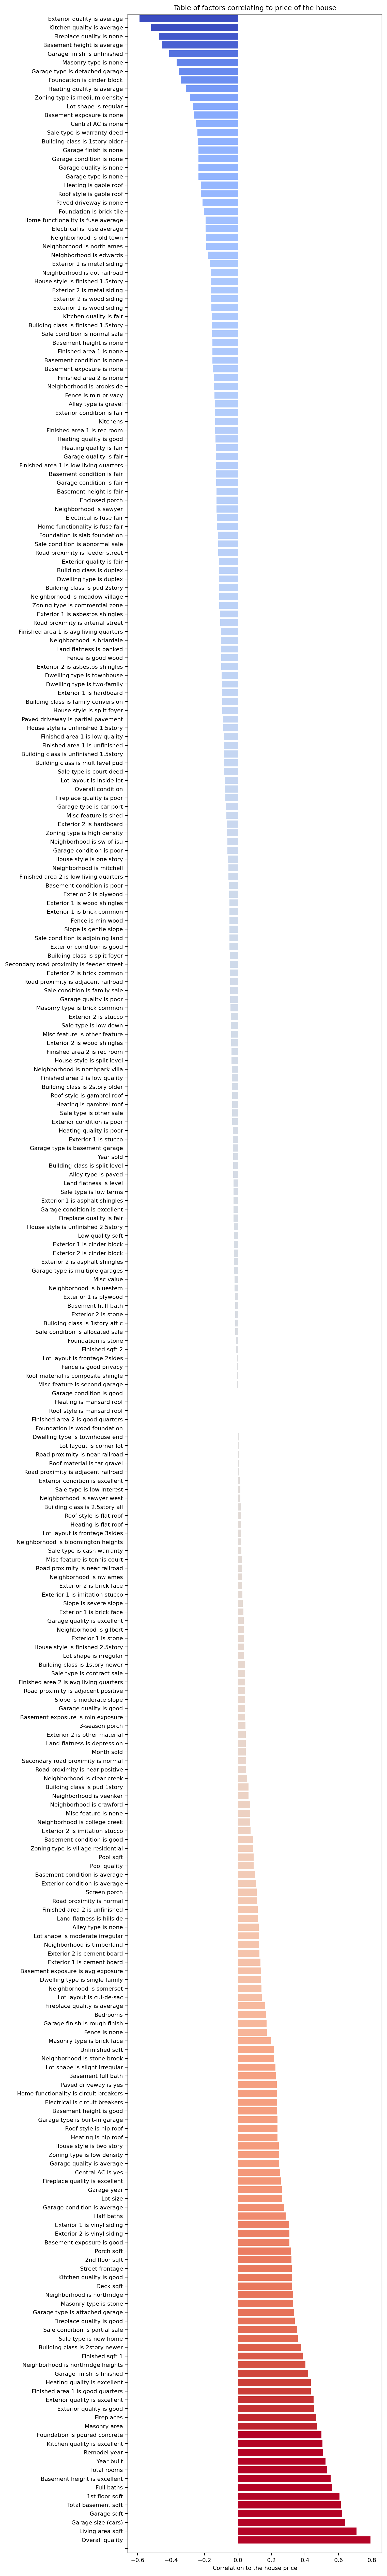

In [ ]:
plt.rcParams['font.size'] = 8

fig = plt.figure(dpi=200, figsize=(5, 50))
ax = fig.add_axes([0, 0, 1, 1])

corr = df_dum_stat.corr()['SalePrice'].sort_values().drop('SalePrice')
colors = [coolwarm(i + .5) for i in corr]

sns.barplot(corr, orient='h', axes=ax)

for bar, color in zip(ax.patches, colors):
  bar.set_facecolor(color)

labels=[]
for i in ax.get_yticklabels():
  label = i.get_text()
  if '_' in label:
    label = label.replace('π', '').split('_')
    label = column_names[label[0]] + " is " + value_names[label[1]]
  else:
    label = column_names[label]
  labels.append(label)
ax.set_yticklabels(labels[:-1])

ax.set_xlabel('Correlation to the house price')
ax.set_title('Table of factors correlating to price of the house')

clear_output()

plt.show()

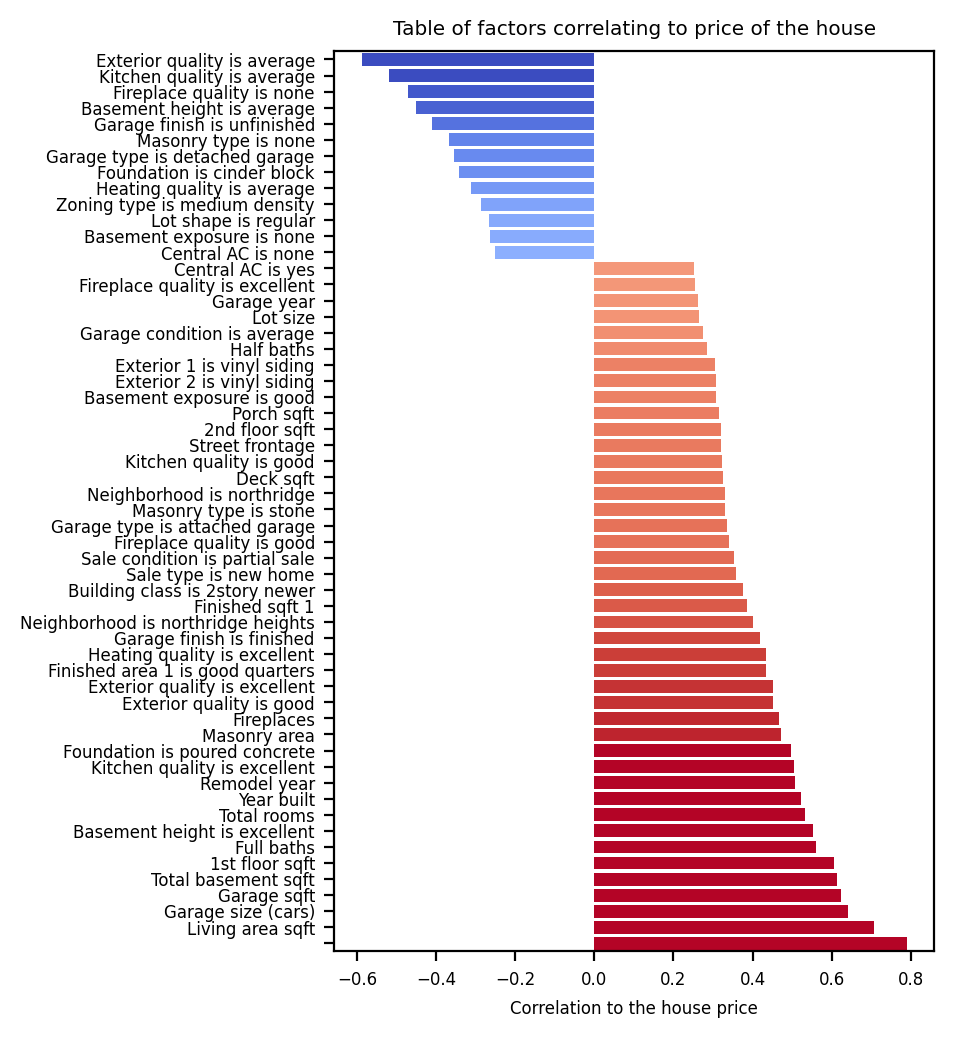

In [ ]:
plt.rcParams['font.size'] = 6

fig = plt.figure(dpi=200, figsize=(3, 4.5))
ax = fig.add_axes([0, 0, 1, 1])

corr = df_dum_stat.corr()['SalePrice'].sort_values().drop('SalePrice')
corr = corr[abs(corr) > .25]
colors = [coolwarm(i + .5) for i in corr]

sns.barplot(corr, orient='h', axes=ax)

for bar, color in zip(ax.patches, colors):
  bar.set_facecolor(color)

labels=[]
for i in ax.get_yticklabels():
  label = i.get_text()
  if '_' in label:
    label = label.replace('π', '').split('_')
    label = column_names[label[0]] + " is " + value_names[label[1]]
  else:
    label = column_names[label]
  labels.append(label)
ax.set_yticklabels(labels[:-1])

ax.set_xlabel('Correlation to the house price')
ax.set_title('Table of factors correlating to price of the house')

clear_output()

plt.show()

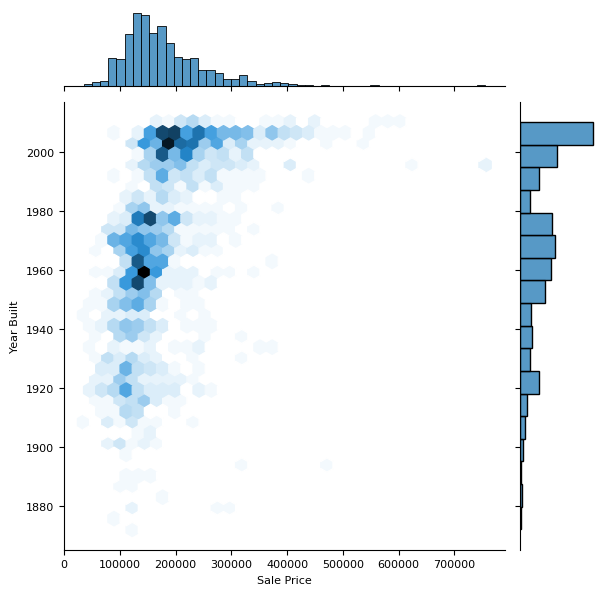

In [ ]:
plt.rcParams['font.size'] = 8

sns.jointplot(data=df, kind='hex', x='SalePrice', y='YearBuilt')

plt.xlabel('Sale Price')
plt.ylabel('Year Built')

plt.show()

Text(0.5, 0, 'Full graph')

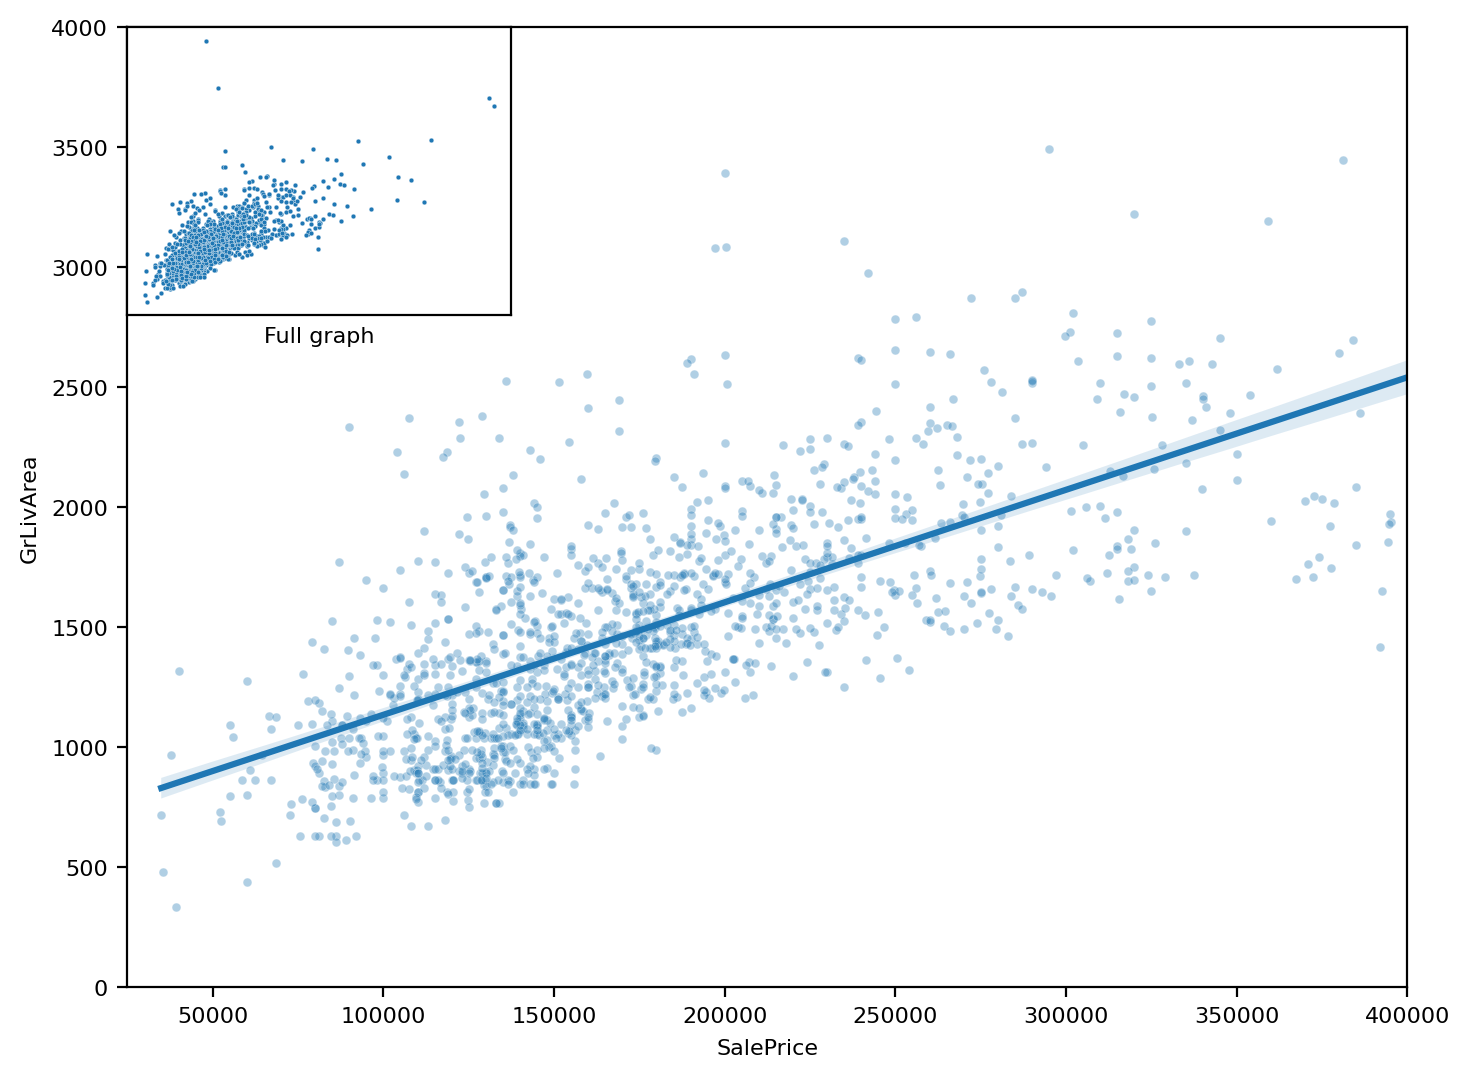

In [ ]:
fig = plt.figure(dpi=200)
ax1 = fig.add_axes([0, 0, 1, 1])

sns.regplot(data=df, x='SalePrice', y='GrLivArea', scatter=False,  ax=ax1)
sns.scatterplot(data=df, x='SalePrice', y='GrLivArea', s=10, alpha=.35, ax=ax1)
ax1.set_xlim(25000, 400000)
ax1.set_ylim(0, 4000)

ax2 = fig.add_axes([0, .7, .3, .3])

sns.scatterplot(data=df, x='SalePrice', y='GrLivArea', s=3, ax=ax2)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_ylabel('')
ax2.set_xlabel('Full graph')

plt.show()

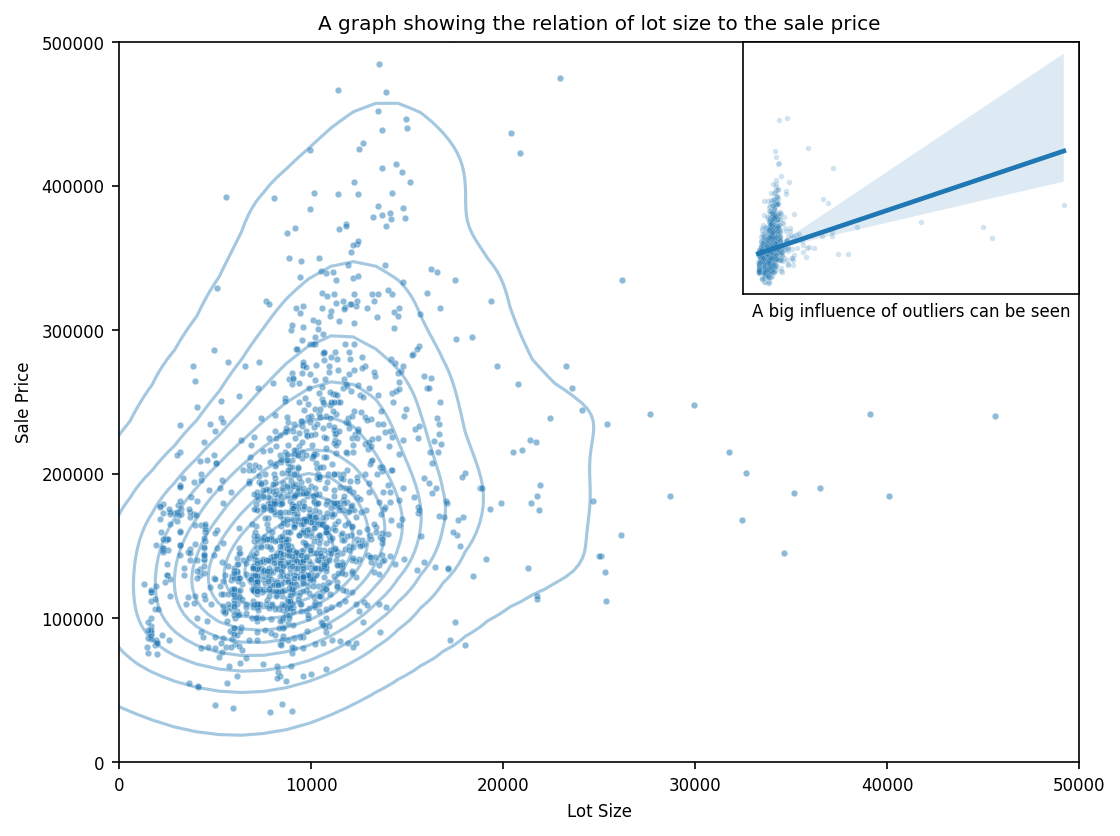

In [424]:
plt.rcParams['font.size'] = 8

fig = plt.figure(dpi=150)

ax1 = fig.add_axes([0, 0, 1, 1])
sns.scatterplot(data=df, x='LotArea', y='SalePrice', ax=ax1, s=10, alpha=.5)
sns.kdeplot(data=df, x='LotArea', y='SalePrice', ax=ax1, alpha=.4)
ax1.set_xlim(0, 50000)
ax1.set_ylim(0, 500000)

ax2 = fig.add_axes([.65, .65, .35, .35])
sns.scatterplot(data=df, x='LotArea', y='SalePrice', ax=ax2, s=7, alpha=.2)
sns.regplot(data=df, x='LotArea', y='SalePrice', ax=ax2, scatter=False)
ax2.set_xlabel('A big influence of outliers can be seen')
ax2.set_ylabel('')
ax2.set_xticks([])
ax2.set_xticklabels([])
ax2.set_yticks([])
ax2.set_yticklabels([])

ax1.set_xlabel('Lot Size')
ax1.set_ylabel('Sale Price')
ax1.set_title('A graph showing the relation of lot size to the sale price')

plt.show()

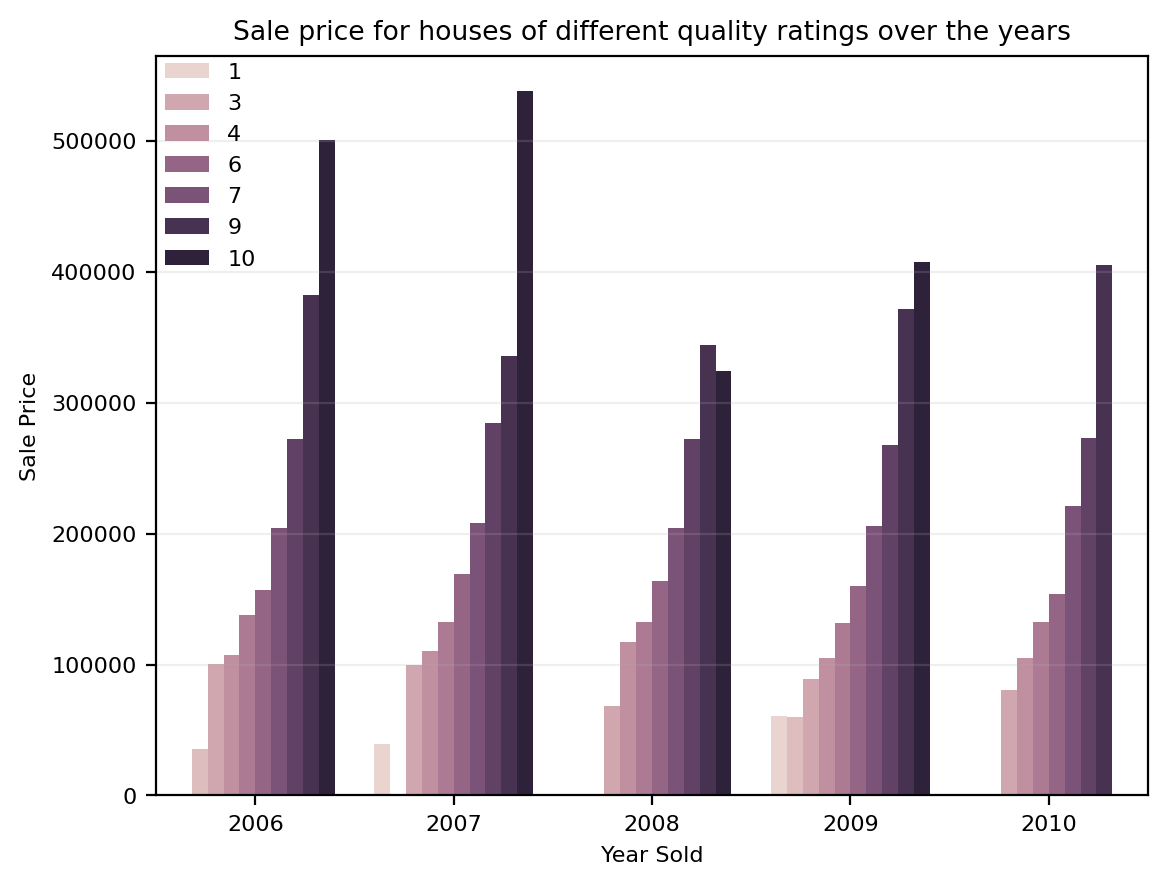

In [ ]:
plt.figure(dpi=200)

sns.barplot(data=df_dum_stat, x='YrSold', y='SalePrice', hue='OverallQual', errorbar=None)

plt.grid(True, alpha=.2, axis='y')
plt.legend(loc=(0,0.7), frameon=False)
plt.title('Sale price for houses of different quality ratings over the years')
plt.ylabel('Sale Price')
plt.xlabel('Year')

plt.show()

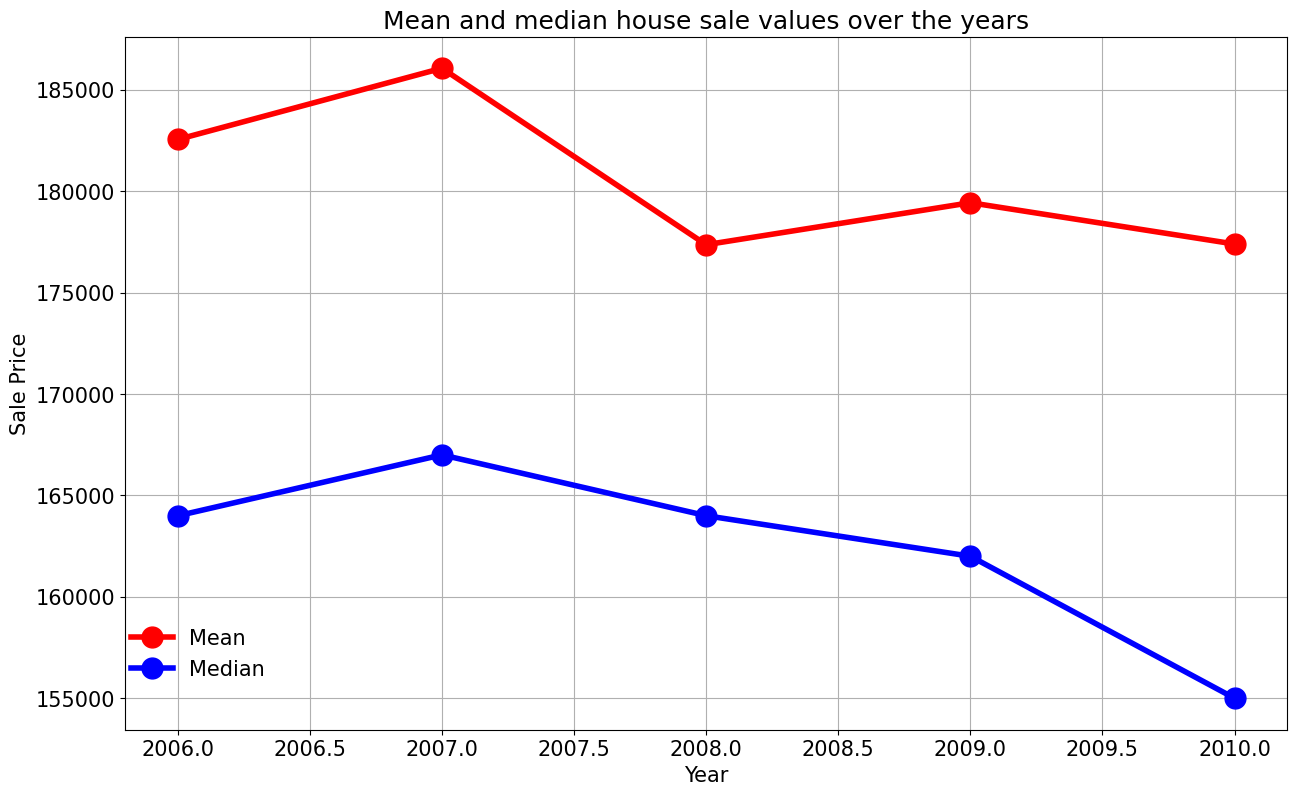

In [ ]:
value_over_the_years = df.groupby('YrSold')['SalePrice'].mean()

plt.rcParams['font.size'] = 15

plt.figure(figsize=(15, 9))

plt.plot(df.groupby('YrSold')['SalePrice'].mean(), marker='.', markersize=30, color='red', linewidth=4)
plt.plot(df.groupby('YrSold')['SalePrice'].median(), marker='.', markersize=30, color='blue', linewidth=4)

plt.legend(['Mean', 'Median'], loc=(-0.002, .061), frameon=False)
plt.title('Mean and median house sale values over the years')
plt.ylabel('Sale Price')
plt.xlabel('Year')
plt.grid(True)

plt.show()

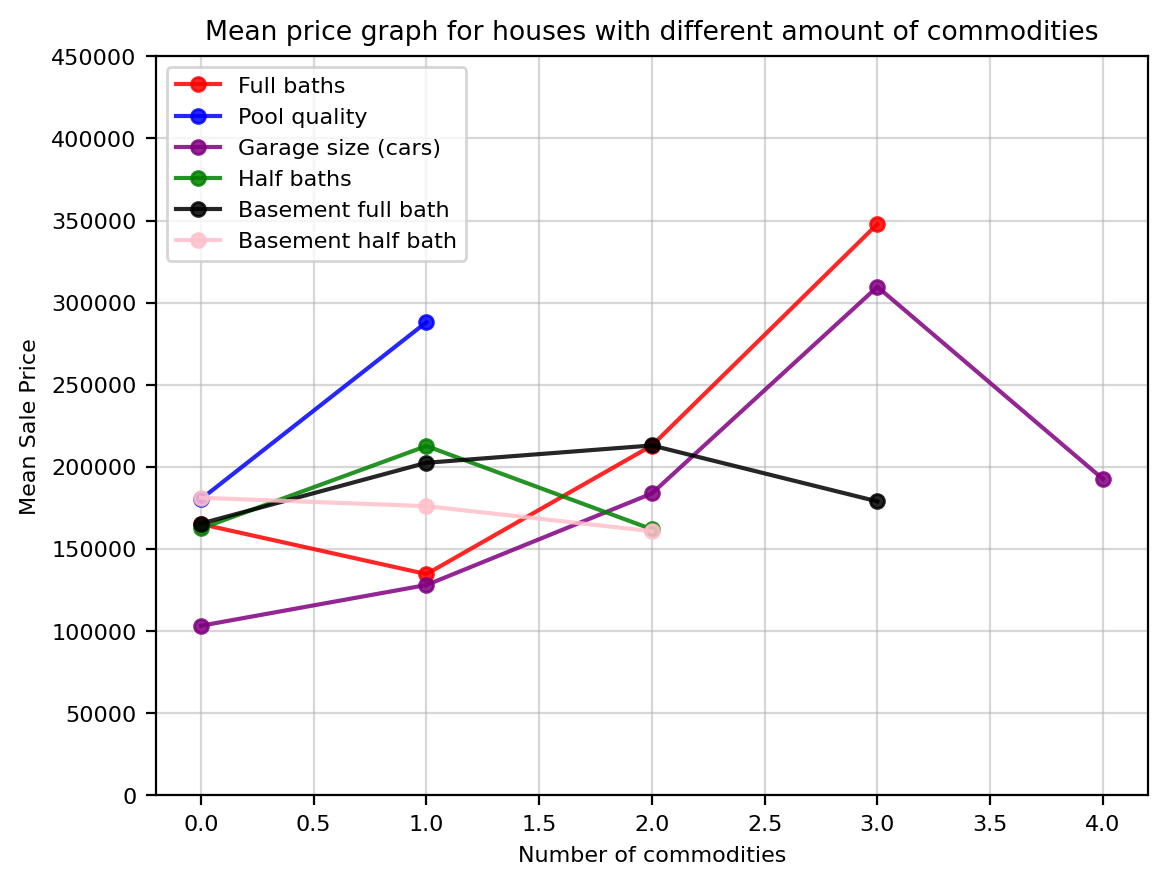

In [312]:
plt.figure(dpi=200)

colors = ['red', 'blue', 'purple', 'green', 'black', 'pink']
columns = ['FullBath', 'PoolQC', 'GarageCars', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']

for column, color in zip(columns, colors):
  plt.plot(df.groupby(column)['SalePrice'].mean().dropna(), marker='.', markersize=10, color=color, linewidth=1.5, alpha=.85)

plt.legend([column_names[i] for i in columns], loc=2)
plt.grid(True, alpha=.5)
plt.ylim(0, 450000)
plt.title('Mean price graph for houses with different amount of commodities')
plt.ylabel('Mean Sale Price')
plt.xlabel('Number of commodities')

plt.show()

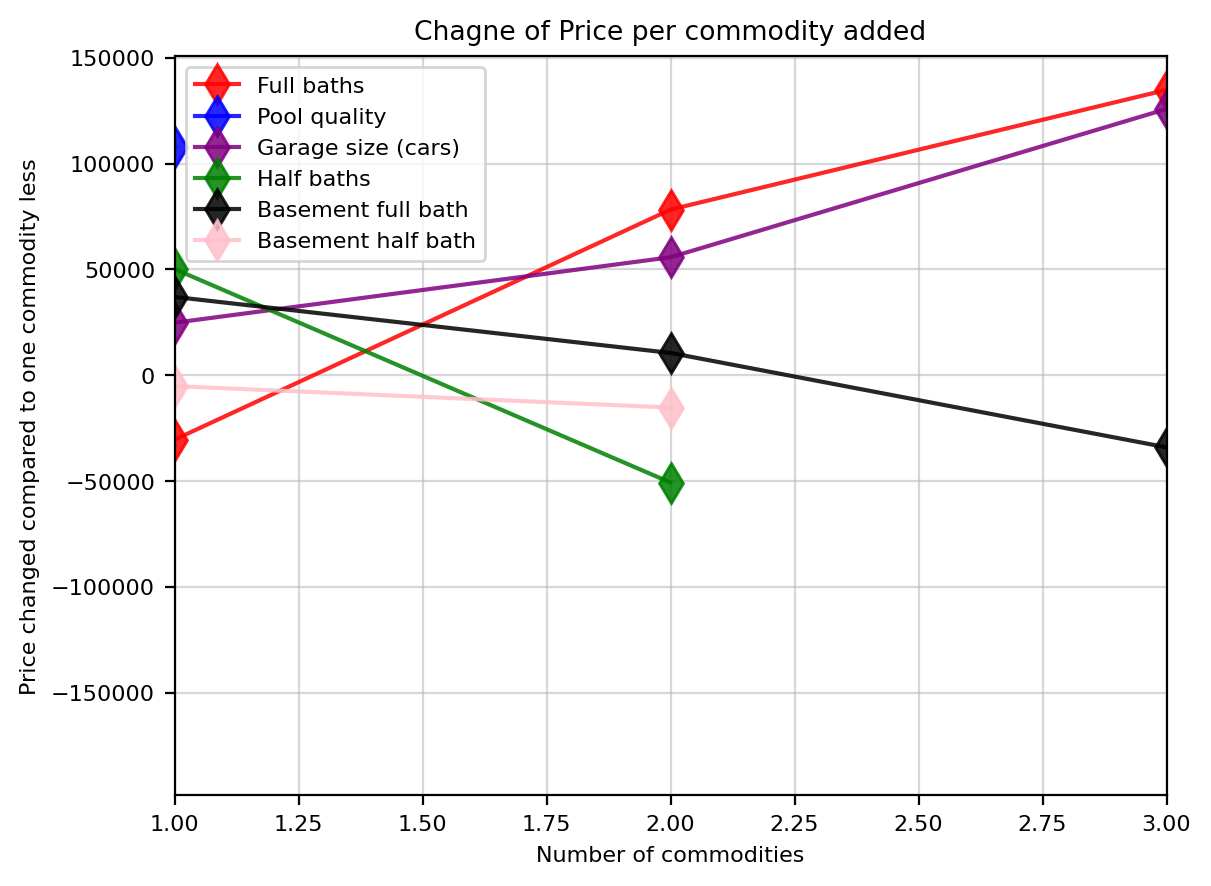

In [333]:
plt.figure(dpi=200)

colors = ['red', 'blue', 'purple', 'green', 'black', 'pink']
columns = ['FullBath', 'PoolQC', 'GarageCars', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']

for column, color in zip(columns, colors):
  groupby = list(df.groupby(column)['SalePrice'].mean().dropna().values)
  plt.plot([i - groupby[groupby.index(i) - 1] for i in groupby], marker='d', markersize=10, color=color, linewidth=1.5, alpha=.85)

plt.legend([column_names[i] for i in columns], loc=2)
plt.xlim(1, 3)
plt.grid(True, alpha=.5)
plt.title('Chagne of Price per commodity added')
plt.ylabel('Price changed compared to one commodity less')
plt.xlabel('Number of commodities')

plt.show()

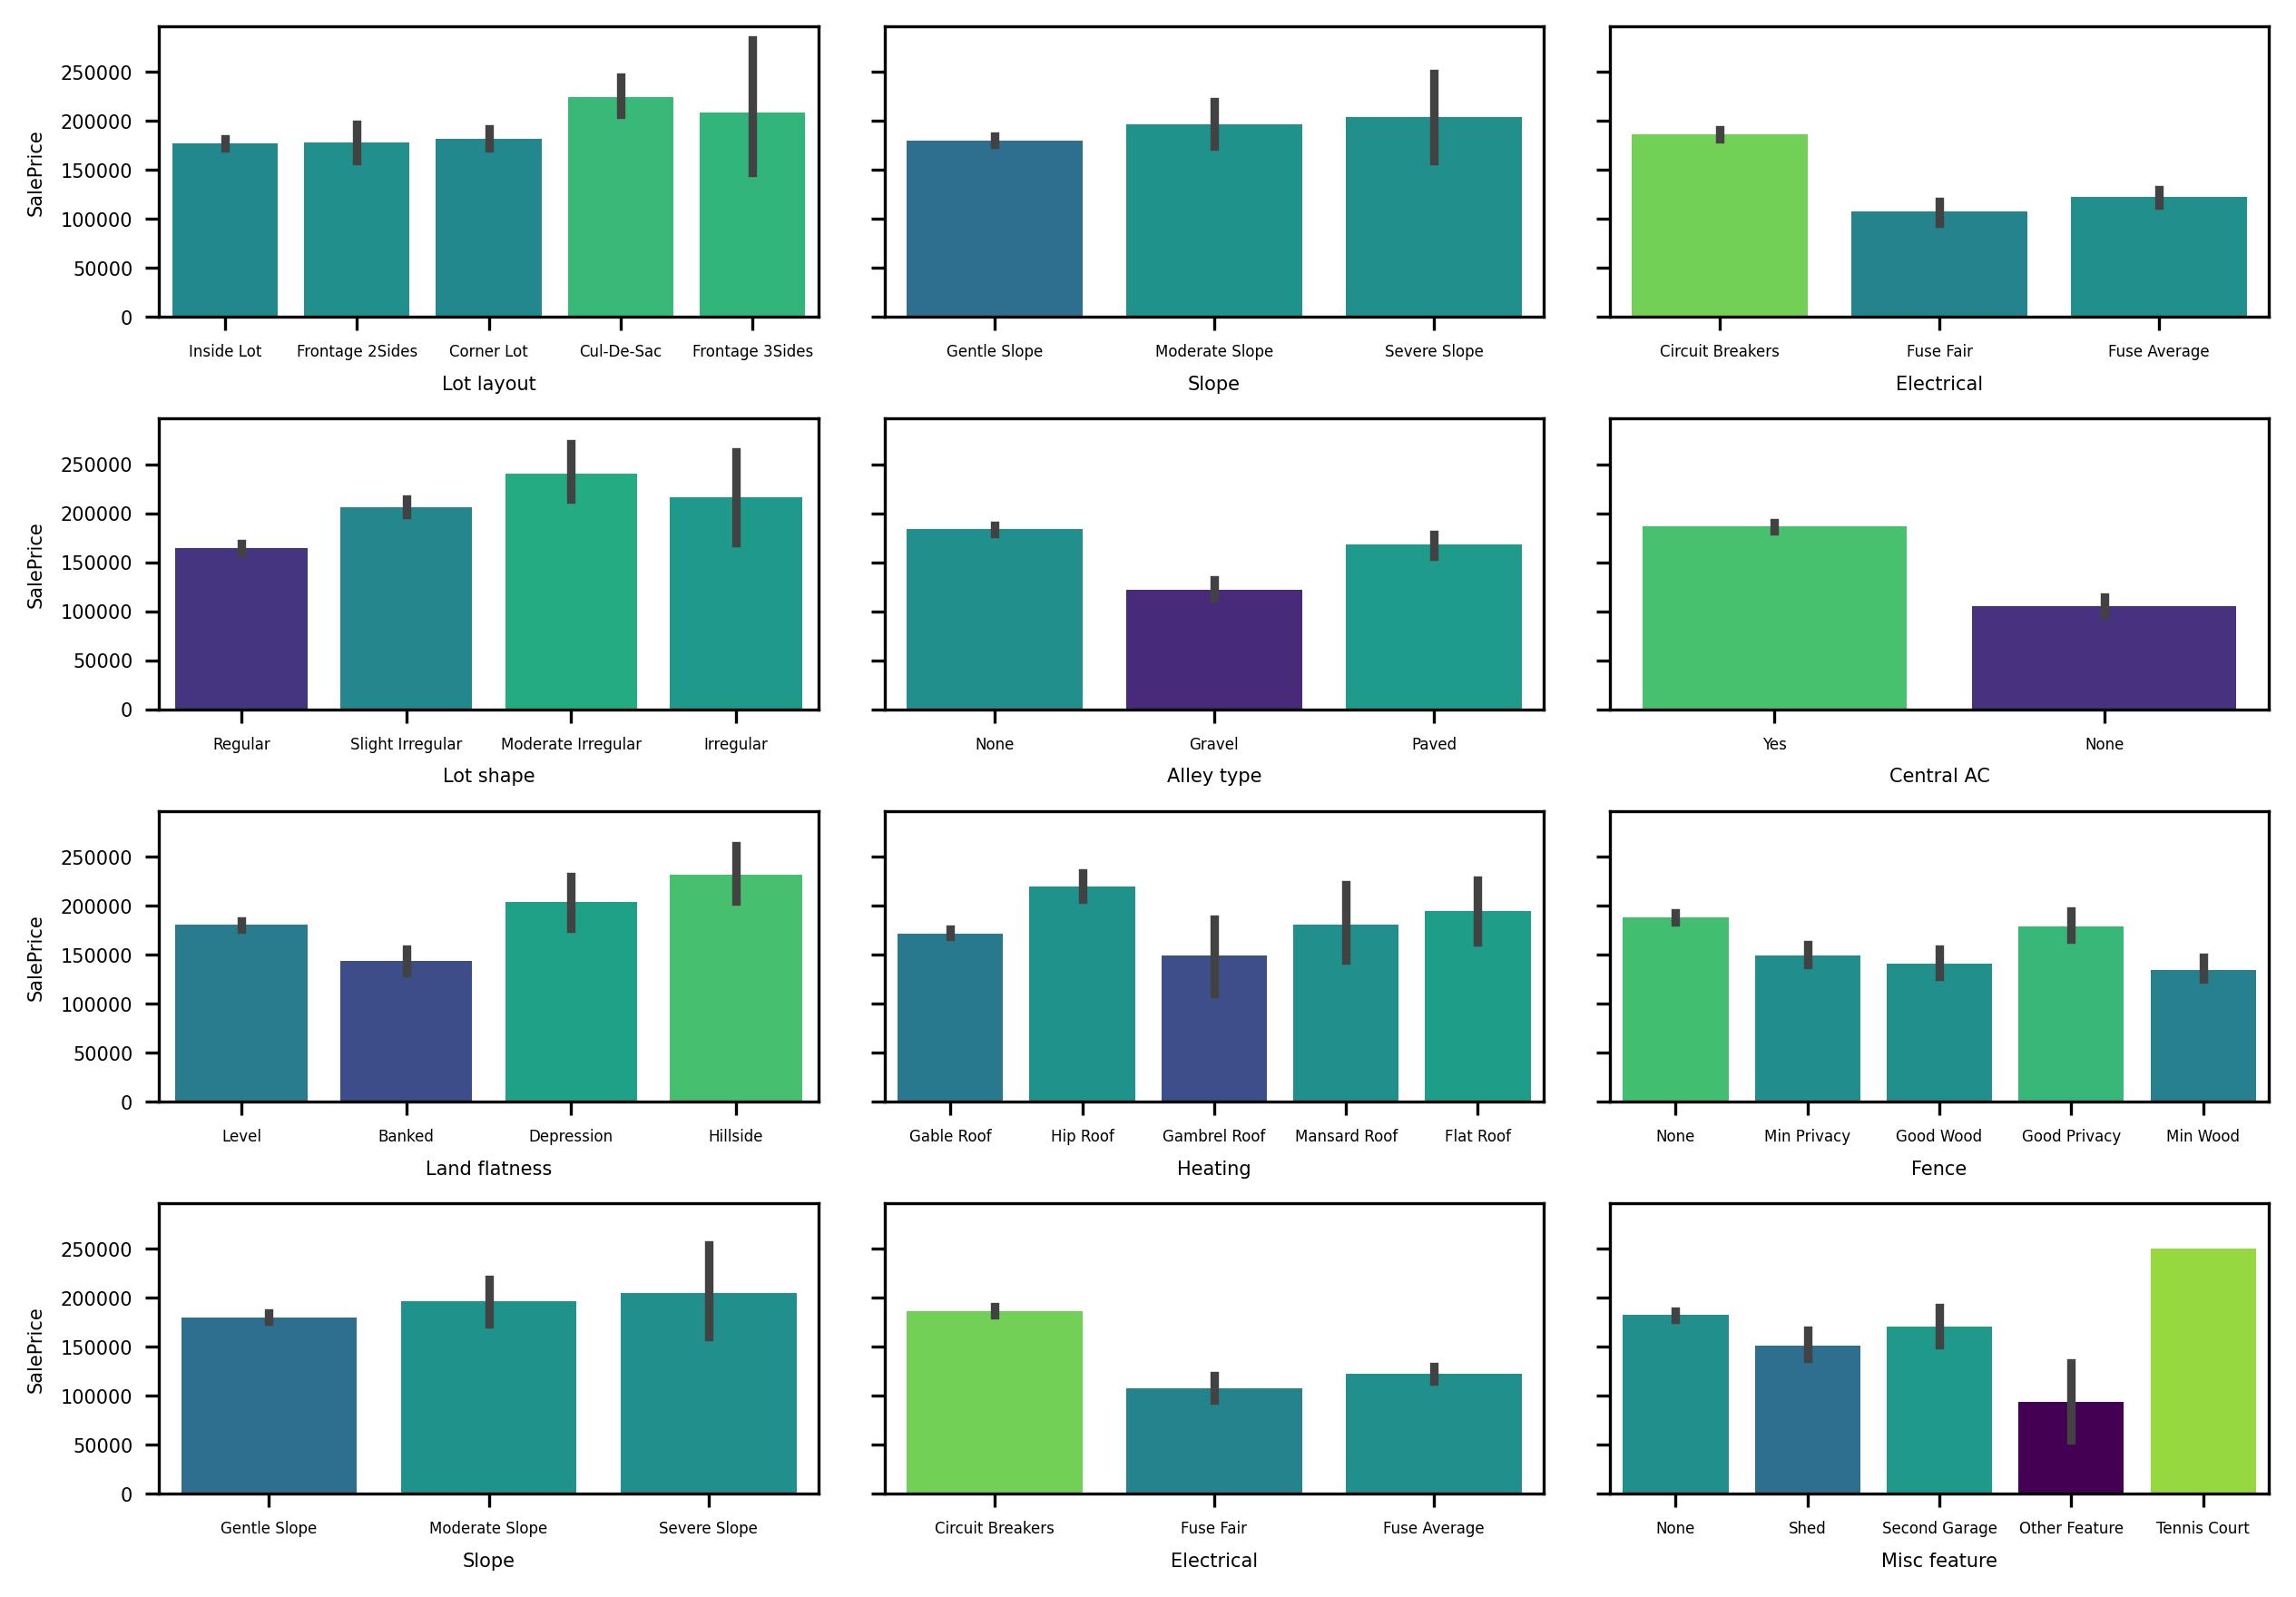

In [407]:
x_num, y_num = 3, 4
columns = ['LotConfig', 'LotShape', 'LandContour', 'LandSlope', 'Alley', 'Heating', 'Electrical', 'CentralAir', 'Fence', 'MiscFeature', 'Foundation', 'RoofStyle']

plt.rcParams['font.size'] = 5

fig, axes = plt.subplots(y_num, x_num,  figsize=(10,7), sharey=True)
fig.dpi=300


for x in range(x_num):
  for y in range(y_num):
    ax = axes[y, x]
    col = columns[x * x_num + y]
    sns.barplot(data=df, x=col, y='SalePrice', ax=ax)

    ax.set_xlabel(column_names[col])

    groupby = df.groupby(col)['SalePrice'].median()
    medians = [groupby[i.get_text()] for i in ax.get_xticklabels()]
    colors = [viridis_r(i) for i in np.median(medians) / medians - .5]

    for bar, color in zip(ax.patches, colors):
      bar.set_facecolor(color)

    labels = []
    for i in ax.get_xticklabels():
      label = i.get_text()
      label = value_names[label].title()
      labels.append(label)
    ax.set_xticklabels(labels, size=4)


plt.subplots_adjust(hspace=.35, wspace=.1)
clear_output()
plt.show()